## 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 2. Reading the data

In [2]:
data = pd.read_excel('lgd_data.xlsx')
data

,Exposure Amount ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region,LGD%
0,238203,729,36,3.81,47603,88,24,4,2,Rent,Home Improvement,Adjustable Rate,South,0.010000
1,170008,745,36,6.68,67474,71,43,4,2,Mortgage,Auto Loan,Adjustable Rate,South,0.757182
2,198937,681,24,8.38,77036,74,46,6,1,Own,Personal Loan,Fixed Rate,West,0.575147
3,262045,684,48,5.45,55083,85,24,0,0,Mortgage,Home Purchase,Adjustable Rate,West,0.009998
4,243378,758,72,6.64,70148,78,40,5,0,Mortgage,Debt Consolidation,Fixed Rate,North,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,77140,723,24,5.62,71515,91,17,3,0,Mortgage,Debt Consolidation,Adjustable Rate,North,0.009995
39996,250556,777,72,6.16,45326,88,34,3,0,Rent,Auto Loan,Fixed Rate,West,0.834943
39997,234493,827,60,5.97,48418,78,24,7,1,Rent,Debt Consolidation,Fixed Rate,West,0.897571
39998,159998,698,36,8.65,85987,73,37,6,0,Mortgage,Personal Loan,Adjustable Rate,West,0.445537


## 3. Descriptive statistics

Dropping unnecessary columns

In [3]:
data.describe(include = 'all')

,Exposure Amount ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region,LGD%
count,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000,40000,40000,40000,40000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,2,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rent,Auto Loan,Adjustable Rate,North,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13420,8163,20161,10165,NaN
mean,149811.070400,700.667300,47.91060,6.499560,60069.306750,79.982225,30.08045,5.002275,0.998925,NaN,NaN,NaN,NaN,0.320288
std,49836.964295,49.974161,17.00847,1.504729,19926.497499,9.986641,9.98215,2.015557,0.818530,NaN,NaN,NaN,NaN,0.341183
min,-82998.000000,505.000000,24.00000,0.380000,-17513.000000,37.000000,-13.00000,-5.000000,0.000000,NaN,NaN,NaN,NaN,0.009717
25%,116398.000000,667.000000,36.00000,5.480000,46567.500000,73.000000,23.00000,4.000000,0.000000,NaN,NaN,NaN,NaN,0.010001
50%,149822.500000,701.000000,48.00000,6.490000,60058.000000,80.000000,30.00000,5.000000,1.000000,NaN,NaN,NaN,NaN,0.197368
75%,183328.000000,734.000000,60.00000,7.520000,73416.750000,87.000000,37.00000,6.000000,2.000000,NaN,NaN,NaN,NaN,0.572629


## 4. Checking and replacing missing values

In [4]:
data.isnull().sum()

Exposure Amount ($)           0
Credit Score                  0
Loan Term (Months)            0
Interest Rate (%)             0
Income ($)                    0
Loan to Value Ratio (%)       0
Debt to Income Ratio (%)      0
Employment History (Years)    0
Previous Defaults             0
Home Ownership                0
Loan Purpose                  0
Loan Type                     0
Region                        0
LGD%                          0
dtype: int64

## 5. Outlier treatment

Checking for outliers for numeric columns using boxplot.

Replacing outliers using the IQR method.

Outliers will be capped to the lower/upper bounds instead of being dropped.

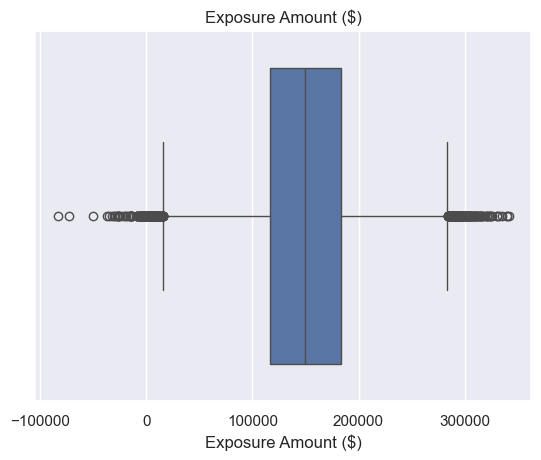

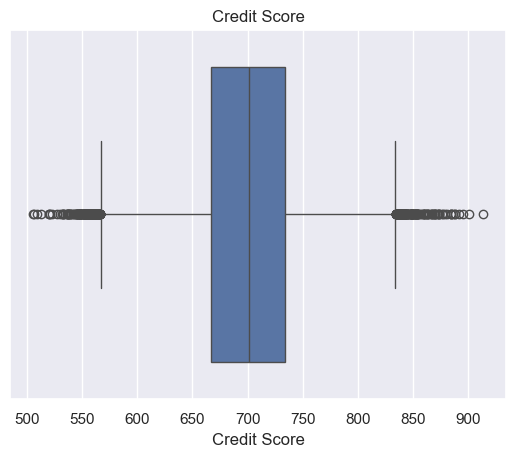

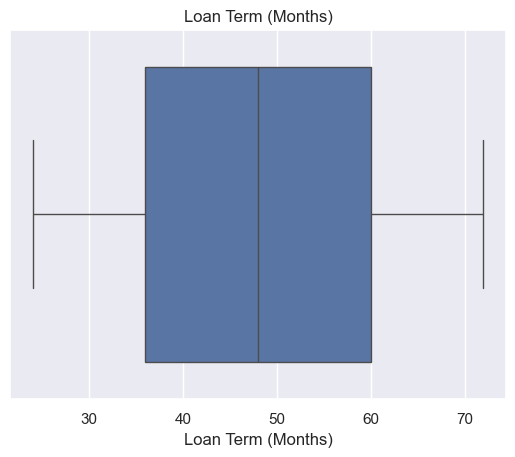

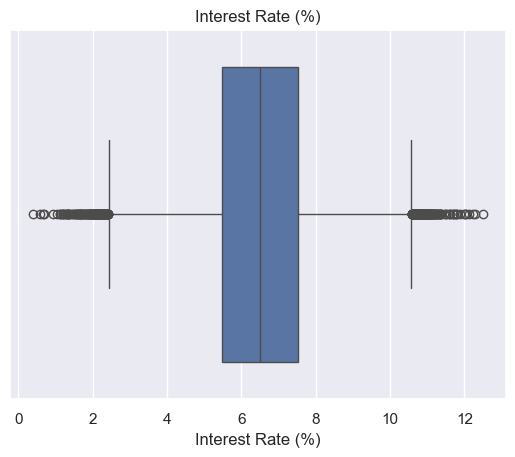

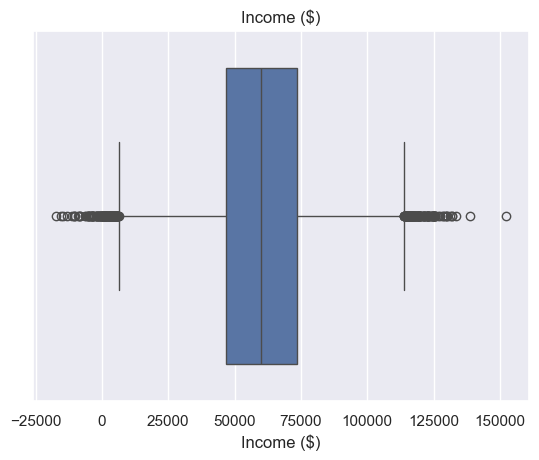

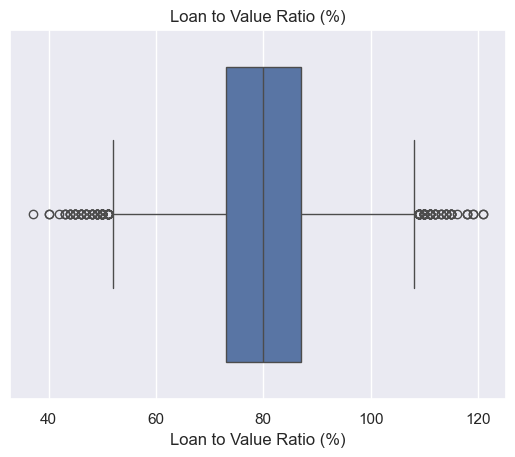

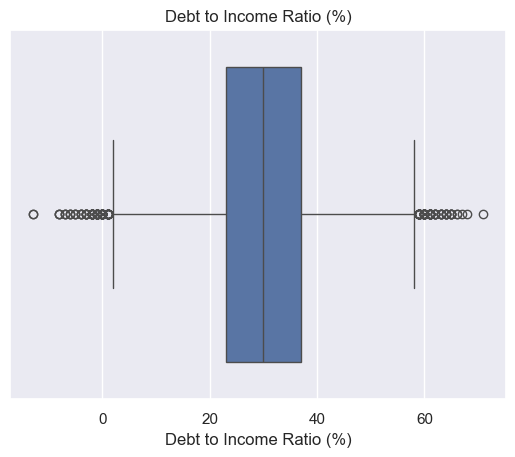

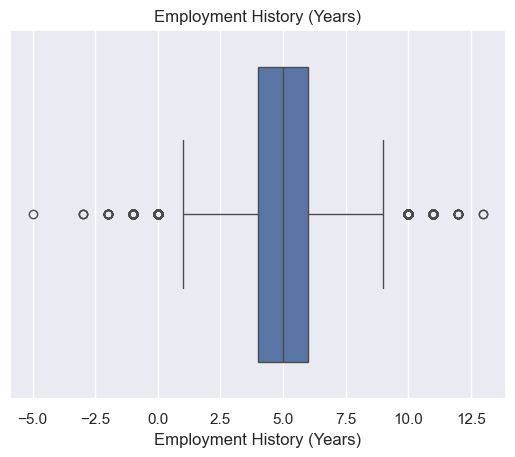

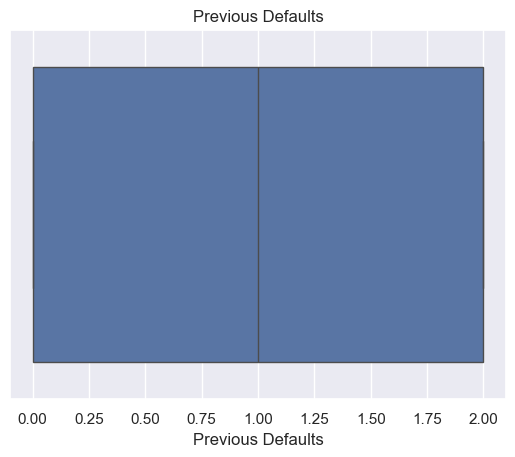

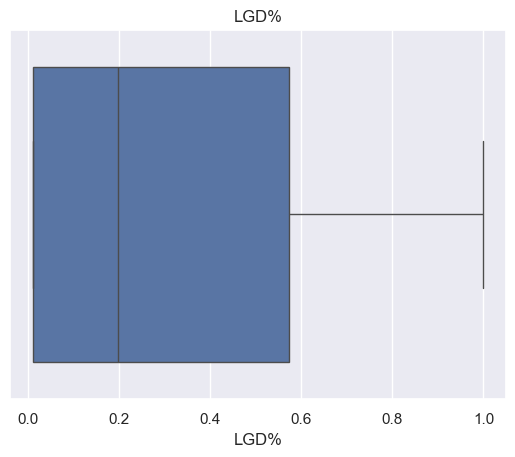

In [5]:
for i in data.columns:
    if data[i].dtype != object:
        sns.boxplot(data = data, x = data[i])
        plt.title(i)
        plt.show()
        print()

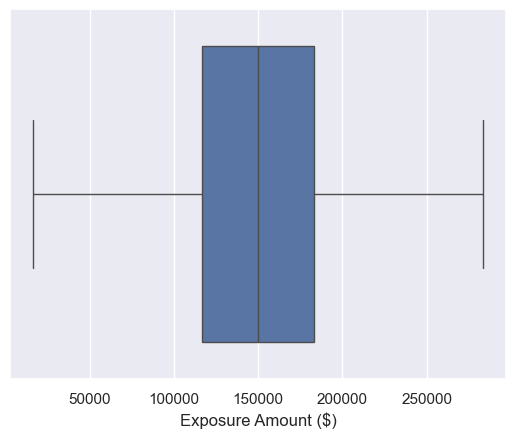

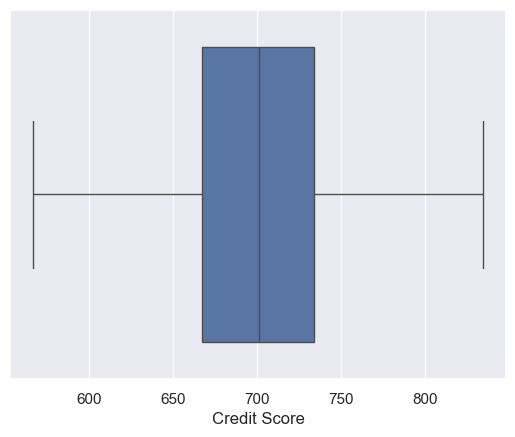

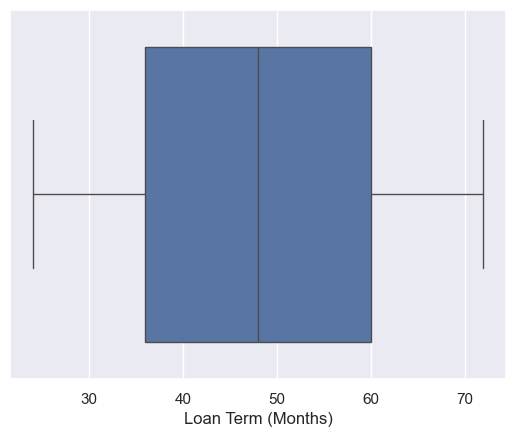

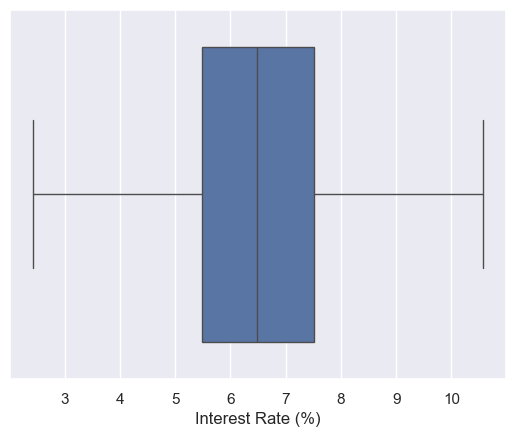

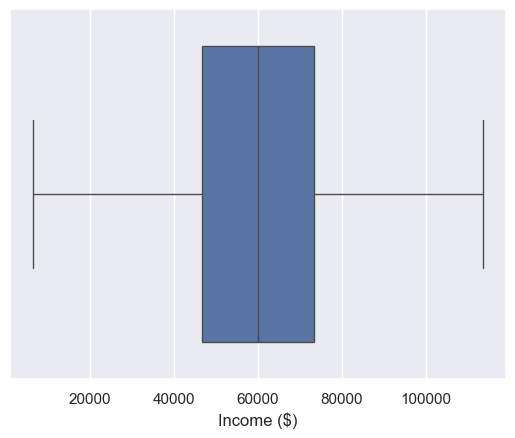

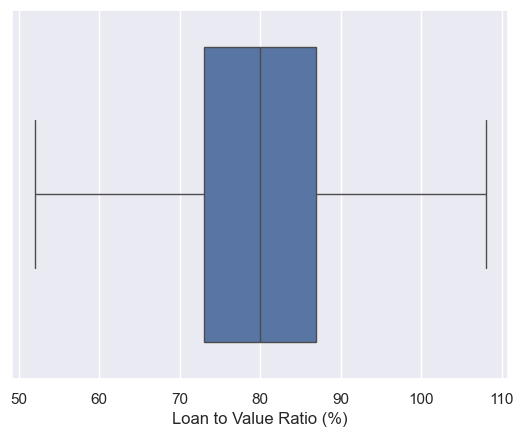

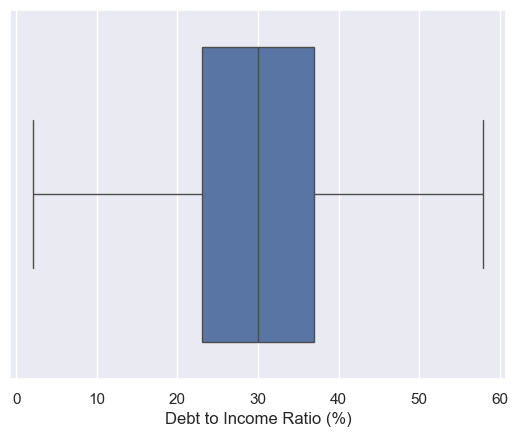

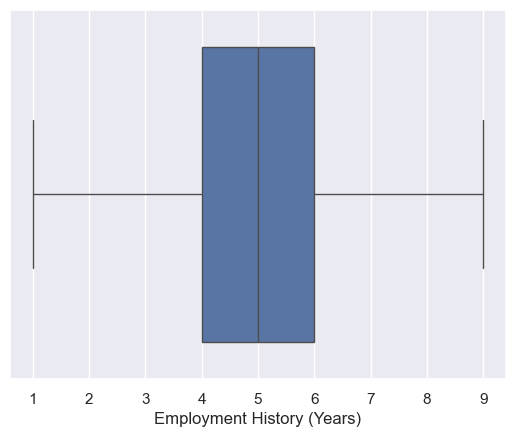

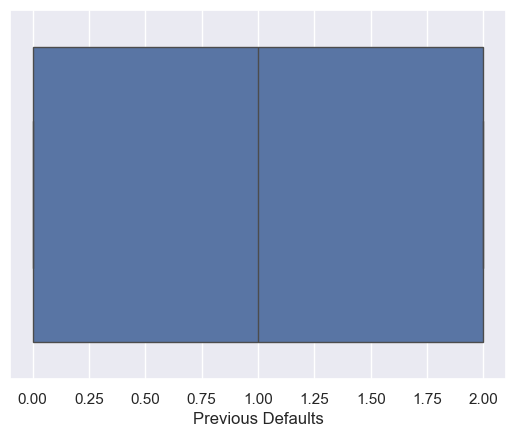

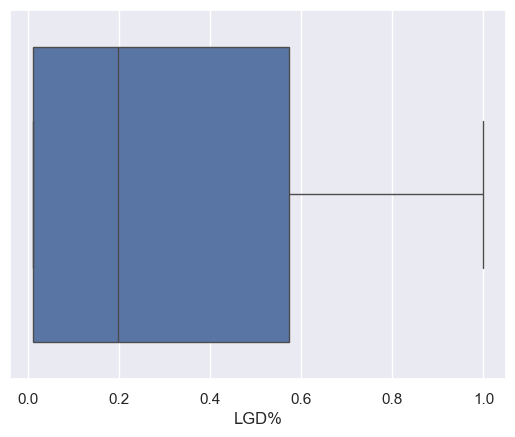

In [6]:
q1 = data.quantile(0.25, numeric_only = True)
q3 = data.quantile(0.75, numeric_only = True)
IQR = q3 - q1

Lower = q1 - 1.5*IQR
Upper = q3 + 1.5*IQR

for i in data.columns:
    if data[i].dtypes != object:
        data[i] = np.where(data[i] > Upper[i], Upper[i], data[i])
        data[i] = np.where(data[i] < Lower[i], Lower[i], data[i])
        sns.boxplot(data = data, x = data[i])
        plt.show()

# 6. Creating and merging new columns (Income_mean_by_Region and Previous_Defaults_mean_by_Credit_Score) 

In [7]:
statistics = ['mean']

for i in statistics:
    result = data.groupby(['Region']).agg({'Income ($)': [i]})
    result.columns = [f'Income ($)_{i}_by_Region']
    result.reset_index(inplace = True)
    
    data = pd.merge(data, result, on = 'Region', how = 'left')

data

,Exposure Amount ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region,LGD%,Income ($)_mean_by_Region
0,238203.0,729.0,36.0,3.81,47603.0,88.0,24.0,4.0,2.0,Rent,Home Improvement,Adjustable Rate,South,0.010000,60082.674340
1,170008.0,745.0,36.0,6.68,67474.0,71.0,43.0,4.0,2.0,Mortgage,Auto Loan,Adjustable Rate,South,0.757182,60082.674340
2,198937.0,681.0,24.0,8.38,77036.0,74.0,46.0,6.0,1.0,Own,Personal Loan,Fixed Rate,West,0.575147,60307.337702
3,262045.0,684.0,48.0,5.45,55083.0,85.0,24.0,1.0,0.0,Mortgage,Home Purchase,Adjustable Rate,West,0.009998,60307.337702
4,243378.0,758.0,72.0,6.64,70148.0,78.0,40.0,5.0,0.0,Mortgage,Debt Consolidation,Fixed Rate,North,1.000000,59985.178837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,77140.0,723.0,24.0,5.62,71515.0,91.0,17.0,3.0,0.0,Mortgage,Debt Consolidation,Adjustable Rate,North,0.009995,59985.178837
39996,250556.0,777.0,72.0,6.16,45326.0,88.0,34.0,3.0,0.0,Rent,Auto Loan,Fixed Rate,West,0.834943,60307.337702
39997,234493.0,827.0,60.0,5.97,48418.0,78.0,24.0,7.0,1.0,Rent,Debt Consolidation,Fixed Rate,West,0.897571,60307.337702
39998,159998.0,698.0,36.0,8.65,85987.0,73.0,37.0,6.0,0.0,Mortgage,Personal Loan,Adjustable Rate,West,0.445537,60307.337702


In [8]:
for i in statistics:
    result = data.groupby(['Credit Score']).agg({'Previous Defaults': [i]})
    result.columns = [f'Previous Defaults_{i}_by_Credit Score']
    result.reset_index(inplace = True)
    
    data = pd.merge(data, result, on = 'Credit Score', how = 'left')
    
data

,Exposure Amount ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region,LGD%,Income ($)_mean_by_Region,Previous Defaults_mean_by_Credit Score
0,238203.0,729.0,36.0,3.81,47603.0,88.0,24.0,4.0,2.0,Rent,Home Improvement,Adjustable Rate,South,0.010000,60082.674340,0.938525
1,170008.0,745.0,36.0,6.68,67474.0,71.0,43.0,4.0,2.0,Mortgage,Auto Loan,Adjustable Rate,South,0.757182,60082.674340,1.022321
2,198937.0,681.0,24.0,8.38,77036.0,74.0,46.0,6.0,1.0,Own,Personal Loan,Fixed Rate,West,0.575147,60307.337702,1.030303
3,262045.0,684.0,48.0,5.45,55083.0,85.0,24.0,1.0,0.0,Mortgage,Home Purchase,Adjustable Rate,West,0.009998,60307.337702,0.985866
4,243378.0,758.0,72.0,6.64,70148.0,78.0,40.0,5.0,0.0,Mortgage,Debt Consolidation,Fixed Rate,North,1.000000,59985.178837,1.046512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,77140.0,723.0,24.0,5.62,71515.0,91.0,17.0,3.0,0.0,Mortgage,Debt Consolidation,Adjustable Rate,North,0.009995,59985.178837,0.986395
39996,250556.0,777.0,72.0,6.16,45326.0,88.0,34.0,3.0,0.0,Rent,Auto Loan,Fixed Rate,West,0.834943,60307.337702,1.033333
39997,234493.0,827.0,60.0,5.97,48418.0,78.0,24.0,7.0,1.0,Rent,Debt Consolidation,Fixed Rate,West,0.897571,60307.337702,1.000000
39998,159998.0,698.0,36.0,8.65,85987.0,73.0,37.0,6.0,0.0,Mortgage,Personal Loan,Adjustable Rate,West,0.445537,60307.337702,0.963087


## 7. Checking data normality

In [9]:
from scipy import stats

for i in data.columns:
    if data[i].dtype in ['int64', 'float64']:
        kstest_statistic, kstest_p_value = stats.kstest(data[i], 'norm')
        print(f'Column: {i}')
        print(f'p-value: {kstest_p_value}')
        
        if kstest_p_value > 0.05:
            print('Data looks normally distributed')
            print()
            
        else:
            print('Data does not look normally distributed')
            print()

Column: Exposure Amount ($)
p-value: 0.0
Data does not look normally distributed

Column: Credit Score
p-value: 0.0
Data does not look normally distributed

Column: Loan Term (Months)
p-value: 0.0
Data does not look normally distributed

Column: Interest Rate (%)
p-value: 0.0
Data does not look normally distributed

Column: Income ($)
p-value: 0.0
Data does not look normally distributed

Column: Loan to Value Ratio (%)
p-value: 0.0
Data does not look normally distributed

Column: Debt to Income Ratio (%)
p-value: 0.0
Data does not look normally distributed

Column: Employment History (Years)
p-value: 0.0
Data does not look normally distributed

Column: Previous Defaults
p-value: 0.0
Data does not look normally distributed

Column: LGD%
p-value: 0.0
Data does not look normally distributed

Column: Income ($)_mean_by_Region
p-value: 0.0
Data does not look normally distributed

Column: Previous Defaults_mean_by_Credit Score
p-value: 0.0
Data does not look normally distributed



## 8. Correlation matrix based on data distribution 

#### Thresholds; 

1. Target: 10%
2. Intercorrelation: 60%

In [10]:
data.corr(method = 'spearman', numeric_only = True)

,Exposure Amount ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,LGD%,Income ($)_mean_by_Region,Previous Defaults_mean_by_Credit Score
Exposure Amount ($),1.000000,0.000537,-0.004889,0.007016,-0.001408,0.001700,0.001135,0.001011,0.003210,0.108719,0.000093,0.002993
Credit Score,0.000537,1.000000,0.005094,0.002438,0.003012,0.003004,-0.005423,0.002966,0.003455,0.489755,0.001896,0.010395
Loan Term (Months),-0.004889,0.005094,1.000000,-0.005708,-0.000408,0.000966,-0.002118,0.000815,-0.002210,0.337089,-0.005692,-0.004345
Interest Rate (%),0.007016,0.002438,-0.005708,1.000000,0.001770,0.000017,-0.000638,0.004275,0.003819,0.165559,-0.000407,0.002013
Income ($),-0.001408,0.003012,-0.000408,0.001770,1.000000,-0.008877,0.010637,-0.004133,-0.000187,0.405091,0.007087,0.000476
Loan to Value Ratio (%),0.001700,0.003004,0.000966,0.000017,-0.008877,1.000000,-0.000482,-0.003582,-0.000311,0.240004,0.003880,-0.008032
Debt to Income Ratio (%),0.001135,-0.005423,-0.002118,-0.000638,0.010637,-0.000482,1.000000,-0.001078,-0.003350,0.319163,0.002722,0.000826
Employment History (Years),0.001011,0.002966,0.000815,0.004275,-0.004133,-0.003582,-0.001078,1.000000,0.004300,0.160256,0.002791,-0.003018
Previous Defaults,0.003210,0.003455,-0.002210,0.003819,-0.000187,-0.000311,-0.003350,0.004300,1.000000,0.253319,-0.000845,0.076758
LGD%,0.108719,0.489755,0.337089,0.165559,0.405091,0.240004,0.319163,0.160256,0.253319,1.000000,0.005827,0.028162


In [11]:
def target_correlation(data, target, threshold = 0.1):
    corr_matrix = data.corr(method = 'spearman', numeric_only = True)
    target_correlations = corr_matrix[target].abs() > threshold
    variables_explaining_target = target_correlations[target_correlations].index.tolist()
    variables_explaining_target.remove(target)
    result_explaining_target = pd.DataFrame(
    {'Variable': variables_explaining_target,
    'Correlation with Target': corr_matrix.loc[variables_explaining_target, target]})
    result_explaining_target.reset_index(drop = True, inplace = True)
    
    return result_explaining_target
    
target_correlation(data, 'LGD%')

,Variable,Correlation with Target
0,Exposure Amount ($),0.108719
1,Credit Score,0.489755
2,Loan Term (Months),0.337089
3,Interest Rate (%),0.165559
4,Income ($),0.405091
5,Loan to Value Ratio (%),0.240004
6,Debt to Income Ratio (%),0.319163
7,Employment History (Years),0.160256
8,Previous Defaults,0.253319


In [12]:
def intercorrelation(data, target, threshold = 0.6):  
    corr_matrix = data.drop(columns = [target]).corr(numeric_only = True)
    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)  
    independent_variable_pairs = np.where(highly_correlated_variables)
    result_intercorrelated_independent = pd.DataFrame({
        'Variable 1': corr_matrix.index[independent_variable_pairs[0]],
        'Variable 2': corr_matrix.columns[independent_variable_pairs[1]]
    })
    
    return result_intercorrelated_independent
    
intercorrelation(data, 'LGD%')

,Variable 1,Variable 2


## 9. VIF (Variance Inflation Factor) calculation

Only the variables between 1-9 interval will be saved.

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data, variables):
    vif_data = data[variables]
    vif_values = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    vif_result = pd.DataFrame({'VIF': vif_values, 'Features': variables})
    return vif_result


vif_result = calculate_vif(data, [
 'Exposure Amount ($)',
 # 'Credit Score',
 'Loan Term (Months)',
 # 'Interest Rate (%)',
 'Income ($)',
 # 'Loan to Value Ratio (%)',
 'Debt to Income Ratio (%)',
 'Employment History (Years)',
 'Previous Defaults',
 # 'Income ($)_mean_by_Region',
 # 'Previous Defaults_mean_by_Credit Score'
])

vif_result

,VIF,Features
0,8.070681,Exposure Amount ($)
1,7.324425,Loan Term (Months)
2,8.120835,Income ($)
3,8.116730,Debt to Income Ratio (%)
4,6.504986,Employment History (Years)
5,2.405987,Previous Defaults


# 10. Dropping unnecessary columns

Necessary variables: The numeric variables that passed VIF + Categorical variables + Dependent variable

In [14]:
data = data.drop(['Credit Score',
                  'Interest Rate (%)',
                  'Loan to Value Ratio (%)',
                  'Income ($)_mean_by_Region',
                  'Previous Defaults_mean_by_Credit Score'], axis = 1)

data

,Exposure Amount ($),Loan Term (Months),Income ($),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region,LGD%
0,238203.0,36.0,47603.0,24.0,4.0,2.0,Rent,Home Improvement,Adjustable Rate,South,0.010000
1,170008.0,36.0,67474.0,43.0,4.0,2.0,Mortgage,Auto Loan,Adjustable Rate,South,0.757182
2,198937.0,24.0,77036.0,46.0,6.0,1.0,Own,Personal Loan,Fixed Rate,West,0.575147
3,262045.0,48.0,55083.0,24.0,1.0,0.0,Mortgage,Home Purchase,Adjustable Rate,West,0.009998
4,243378.0,72.0,70148.0,40.0,5.0,0.0,Mortgage,Debt Consolidation,Fixed Rate,North,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
39995,77140.0,24.0,71515.0,17.0,3.0,0.0,Mortgage,Debt Consolidation,Adjustable Rate,North,0.009995
39996,250556.0,72.0,45326.0,34.0,3.0,0.0,Rent,Auto Loan,Fixed Rate,West,0.834943
39997,234493.0,60.0,48418.0,24.0,7.0,1.0,Rent,Debt Consolidation,Fixed Rate,West,0.897571
39998,159998.0,36.0,85987.0,37.0,6.0,0.0,Mortgage,Personal Loan,Adjustable Rate,West,0.445537


## 11. Converting categorical variables to numeric

All thecategorical variables will be converted to numeric using the One-Hot Encoding technique.

In [15]:
data = pd.get_dummies(data, drop_first = True, dtype = int)

data

,Exposure Amount ($),Loan Term (Months),Income ($),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,LGD%,Home Ownership_Own,Home Ownership_Rent,Loan Purpose_Debt Consolidation,Loan Purpose_Home Improvement,Loan Purpose_Home Purchase,Loan Purpose_Personal Loan,Loan Type_Fixed Rate,Region_North,Region_South,Region_West
0,238203.0,36.0,47603.0,24.0,4.0,2.0,0.010000,0,1,0,1,0,0,0,0,1,0
1,170008.0,36.0,67474.0,43.0,4.0,2.0,0.757182,0,0,0,0,0,0,0,0,1,0
2,198937.0,24.0,77036.0,46.0,6.0,1.0,0.575147,1,0,0,0,0,1,1,0,0,1
3,262045.0,48.0,55083.0,24.0,1.0,0.0,0.009998,0,0,0,0,1,0,0,0,0,1
4,243378.0,72.0,70148.0,40.0,5.0,0.0,1.000000,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,77140.0,24.0,71515.0,17.0,3.0,0.0,0.009995,0,0,1,0,0,0,0,1,0,0
39996,250556.0,72.0,45326.0,34.0,3.0,0.0,0.834943,0,1,0,0,0,0,1,0,0,1
39997,234493.0,60.0,48418.0,24.0,7.0,1.0,0.897571,0,1,1,0,0,0,1,0,0,1
39998,159998.0,36.0,85987.0,37.0,6.0,0.0,0.445537,0,0,0,0,0,1,0,0,0,1


## 12. Separating Target and Inputs Variables

In [16]:
target = data['LGD%']
inputs = data.drop('LGD%', axis = 1)

## 13. Feature Scaling

Standardization will be applied to the input variables.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs) 

StandardScaler()

In [18]:
inputs_scaled = scaler.transform(inputs)
data_scaled = pd.DataFrame(inputs_scaled, columns = inputs.columns)

data_scaled

,Exposure Amount ($),Loan Term (Months),Income ($),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership_Own,Home Ownership_Rent,Loan Purpose_Debt Consolidation,Loan Purpose_Home Improvement,Loan Purpose_Home Purchase,Loan Purpose_Personal Loan,Loan Type_Fixed Rate,Region_North,Region_South,Region_West
0,1.786404,-0.700283,-0.629277,-0.612479,-0.517597,1.223032,-0.709601,1.407347,-0.501484,1.988973,-0.493154,-0.496208,-0.991982,-0.583701,1.736798,-0.578274
1,0.408114,-0.700283,0.373902,1.300527,-0.517597,1.223032,-0.709601,-0.710557,-0.501484,-0.502772,-0.493154,-0.496208,-0.991982,-0.583701,1.736798,-0.578274
2,0.992798,-1.405823,0.856635,1.602580,0.513114,0.001313,1.409243,-0.710557,-0.501484,-0.502772,-0.493154,2.015284,1.008083,-0.583701,-0.575772,1.729284
3,2.268275,0.005256,-0.251653,-0.612479,-2.063665,-1.220405,-0.709601,-0.710557,-0.501484,-0.502772,2.027763,-0.496208,-0.991982,-0.583701,-0.575772,1.729284
4,1.890996,1.416336,0.508897,0.998473,-0.002242,-1.220405,-0.709601,-0.710557,1.994082,-0.502772,-0.493154,-0.496208,1.008083,1.713205,-0.575772,-0.578274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,-1.468843,-1.405823,0.577910,-1.317271,-1.032953,-1.220405,-0.709601,-0.710557,1.994082,-0.502772,-0.493154,-0.496208,-0.991982,1.713205,-0.575772,-0.578274
39996,2.036071,1.416336,-0.744231,0.394366,-1.032953,-1.220405,-0.709601,1.407347,-0.501484,-0.502772,-0.493154,-0.496208,1.008083,-0.583701,-0.575772,1.729284
39997,1.711421,0.710796,-0.588132,-0.612479,1.028470,0.001313,-0.709601,1.407347,1.994082,-0.502772,-0.493154,-0.496208,1.008083,-0.583701,-0.575772,1.729284
39998,0.205801,-0.700283,1.308522,0.696420,0.513114,-1.220405,-0.709601,-0.710557,-0.501484,-0.502772,-0.493154,2.015284,-0.991982,-0.583701,-0.575772,1.729284


## 14. Train and Test split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size = 0.2, random_state = 42)

## 15. Modeling

Fitting a Linear Regression model to the training data

In [20]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

## 16. Prediction and Model Performance

Checking errors (MAE, MSE, RMSE and R2) 

In [21]:
y_pred = reg.predict(X_test)
y_pred_train = reg.predict(X_train)

In [22]:
from sklearn import metrics


mae_test = metrics.mean_absolute_error(y_test, y_pred)
mse_test = metrics.mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = metrics.r2_score(y_test, y_pred)

mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = metrics.r2_score(y_train, y_pred_train)

def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

n_train = len(y_train)
n_test = len(y_test)
k = X_train.shape[1]

adj_r2_train = adjusted_r2(r2_train, n_train, k)
adj_r2_test = adjusted_r2(r2_test, n_test, k)


results_dict = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2', 'Adjusted R2'],
    'Train': [mae_train, mse_train, rmse_train, r2_train, adj_r2_train],
    'Test': [mae_test, mse_test, rmse_test, r2_test, adj_r2_test]
}


results_df = pd.DataFrame(results_dict)

results_df

,Metric,Train,Test
0,MAE,0.196872,0.198834
1,MSE,0.059118,0.060108
2,RMSE,0.243142,0.245170
3,R2,0.492870,0.480521
4,Adjusted R2,0.492617,0.479480


## 17. Univariate Analysis

Creating a linear regression model between each independent variable and target. R2 will be reviewed.



In [23]:
results = []

for i in X_train.columns: 
    X_train_single_var = X_train[[i]]
    X_test_single_var = X_test[[i]]

    reg.fit(X_train_single_var, y_train)
    
    y_pred_train_single_var = reg.predict(X_train_single_var)

    train_r2 = metrics.r2_score(y_train, y_pred_train_single_var)

    y_pred_test_single_var = reg.predict(X_test_single_var)

    test_r2 = metrics.r2_score(y_test, y_pred_test_single_var)

    results.append({'Variable': i, 'Train R2': train_r2, 'Test R2': test_r2})

results_df = pd.DataFrame(results)

results_df_sorted = results_df.sort_values(by = 'Test R2', ascending = False)

results_df_sorted

,Variable,Train R2,Test R2
2,Income ($),1.731096e-01,0.159929
1,Loan Term (Months),1.101374e-01,0.113298
3,Debt to Income Ratio (%),1.081936e-01,0.101993
5,Previous Defaults,6.345464e-02,0.064793
4,Employment History (Years),2.556484e-02,0.031549
0,Exposure Amount ($),1.332307e-02,0.010389
15,Region_West,3.970387e-05,-0.000053
12,Loan Type_Fixed Rate,1.914607e-06,-0.000085
10,Loan Purpose_Home Purchase,6.104503e-07,-0.000103
7,Home Ownership_Rent,2.296462e-06,-0.000110


In [24]:
filtered_results = results_df_sorted[results_df_sorted['Test R2'] > 0.01]
filtered_results

,Variable,Train R2,Test R2
2,Income ($),0.173110,0.159929
1,Loan Term (Months),0.110137,0.113298
3,Debt to Income Ratio (%),0.108194,0.101993
5,Previous Defaults,0.063455,0.064793
4,Employment History (Years),0.025565,0.031549
0,Exposure Amount ($),0.013323,0.010389


## 18. Fitting a new model using the selected variables. 

In [25]:
filtered_results.Variable.tolist()

['Income ($)',
 'Loan Term (Months)',
 'Debt to Income Ratio (%)',
 'Previous Defaults',
 'Employment History (Years)',
 'Exposure Amount ($)']

In [26]:
selected_variables = data_scaled[['Income ($)',
 'Loan Term (Months)',
 'Debt to Income Ratio (%)',
 'Previous Defaults',
 'Employment History (Years)',
 'Exposure Amount ($)']]

X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(selected_variables, target, test_size = 0.2, random_state = 42)

In [27]:
reg = LinearRegression()
reg.fit(X_train_uni, y_train_uni)

LinearRegression()

In [28]:
y_pred_uni = reg.predict(X_test_uni)
y_pred_train_uni = reg.predict(X_train_uni)

In [29]:
mae_test = metrics.mean_absolute_error(y_test_uni, y_pred_uni)
mse_test = metrics.mean_squared_error(y_test_uni, y_pred_uni)
rmse_test = np.sqrt(mse_test)
r2_test = metrics.r2_score(y_test_uni, y_pred_uni)

mae_train = metrics.mean_absolute_error(y_train_uni, y_pred_train_uni)
mse_train = metrics.mean_squared_error(y_train_uni, y_pred_train_uni)
rmse_train = np.sqrt(mse_train)
r2_train = metrics.r2_score(y_train_uni, y_pred_train_uni)

def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

n_train = len(y_train_uni)
n_test = len(y_test_uni)
k = X_train_uni.shape[1]

adj_r2_train = adjusted_r2(r2_train, n_train, k)
adj_r2_test = adjusted_r2(r2_test, n_test, k)


results_dict = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2', 'Adjusted R2'],
    'Train': [mae_train, mse_train, rmse_train, r2_train, adj_r2_train],
    'Test': [mae_test, mse_test, rmse_test, r2_test, adj_r2_test]
}

results_df = pd.DataFrame(results_dict)

results_df

,Metric,Train,Test
0,MAE,0.196889,0.198746
1,MSE,0.059135,0.060069
2,RMSE,0.243178,0.245090
3,R2,0.492722,0.480858
4,Adjusted R2,0.492627,0.480469
